In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import classifiers

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Prepairing dataset

In [3]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X, y, test_size=0.9, train_size=0.1)
x_train, x_test, y_train, y_test = train_test_split( X_TEST, Y_TEST, test_size=0.15)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split( X_TRAIN, Y_TRAIN, test_size=0.15)

print('Train set size short = ', x_train_s.shape[0])
print('Test set size short  = ', x_test_s.shape[0])

print('Train set size = ', x_train.shape[0])
print('Test set size = ', x_test.shape[0])

Train set size short =  5950
Test set size short  =  1050
Train set size =  53550
Test set size =  9450


In [4]:
support_vec = None

def Test(dataset):
    global support_vec
    print('\nLogisticRegression:')
    classifiers.Logistic_Regression(*dataset)
    print('\nKNN:')
    classifiers.KNN(*dataset)
    print('\nDesicionTree:')
    classifiers.DesicionTree(*dataset)
    print('\nSVM:')
    support_vec = classifiers.SVM(*dataset)

# HyperParameters


LogisticRegression:
Best model params: 
Penalty: l2 | Tol: 0.1 | Solver: saga - > Accuracy = 0.9133333333333333
Accuracy:  0.9193650793650794

KNN:
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 5 - > Accuracy = 0.9438095238095238
Accuracy:  0.9692063492063492

DesicionTree:
Best model params: 
Criterion: gini | Splitter: best | Max_depth: 11 - > Accuracy = 0.8180952380952381
Accuracy:  0.8670899470899471

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 1 - > Accuracy = 0.9704761904761905
Accuracy:  0.9823280423280424


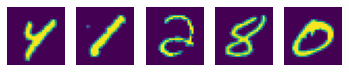

In [5]:
dataset = [x_train_s, y_train_s, x_test_s, y_test_s, x_train, y_train, x_test, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train[i], (28,28)))

Test(dataset)

# Standart scaller


LogisticRegression:
Best model params: 
Penalty: l2 | Tol: 0.01 | Solver: saga - > Accuracy = 0.9
Accuracy:  0.9111111111111111

KNN:
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 3 - > Accuracy = 0.9295238095238095
Accuracy:  0.9608465608465608

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 14 - > Accuracy = 0.819047619047619
Accuracy:  0.8757671957671957

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.94
Accuracy:  0.968994708994709


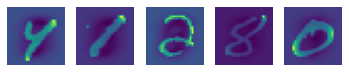

In [6]:
scaler = StandardScaler()
x_train_s_stsc = scaler.fit_transform(x_train_s, y_train_s)
x_test_s_stsc = scaler.transform(x_test_s)
x_train_stsc = scaler.fit_transform(x_train, y_train)
x_test_stsc = scaler.transform(x_test)
dataset = [x_train_s_stsc, y_train_s, x_test_s_stsc, y_test_s, x_train_stsc, y_train, x_test_stsc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_stsc[i], (28,28)))

Test(dataset)

# MinMax scaler


LogisticRegression:
Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.9066666666666666
Accuracy:  0.9202116402116403

KNN:
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 5 - > Accuracy = 0.9438095238095238
Accuracy:  0.9691005291005291

DesicionTree:
Best model params: 
Criterion: gini | Splitter: best | Max_depth: 11 - > Accuracy = 0.8180952380952381
Accuracy:  0.8659259259259259

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 1 - > Accuracy = 0.9666666666666667
Accuracy:  0.9815873015873016


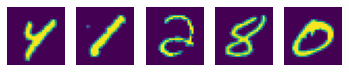

In [7]:
scaler = MinMaxScaler()
x_train_s_stmm = scaler.fit_transform(x_train_s, y_train_s)
x_test_s_stmm = scaler.transform(x_test_s)
x_train_stmm = scaler.fit_transform(x_train, y_train)
x_test_stmm = scaler.transform(x_test)
dataset = [x_train_s_stmm, y_train_s, x_test_s_stmm, y_test_s, x_train_stmm, y_train, x_test_stmm, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_stmm[i], (28,28)))

Test(dataset)

# PCA


LogisticRegression:
Best model params: 
Penalty: l2 | Tol: 1 | Solver: newton-cg - > Accuracy = 0.9019047619047619
Accuracy:  0.9065608465608466

KNN:
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 3 - > Accuracy = 0.959047619047619
Accuracy:  0.9738624338624339

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 14 - > Accuracy = 0.7895238095238095
Accuracy:  0.852910052910053

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.9742857142857143
Accuracy:  0.9859259259259259


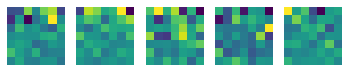

In [8]:
pca = PCA(n_components = 49)
x_train_s_pc = pca.fit_transform(x_train_s, y_train_s)
x_test_s_pc = pca.transform(x_test_s)
x_train_pc = pca.fit_transform(x_train, y_train)
x_test_pc = pca.transform(x_test)
dataset = [x_train_s_pc, y_train_s, x_test_s_pc, y_test_s, x_train_pc, y_train, x_test_pc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc[i], (7,7)))

Test(dataset)

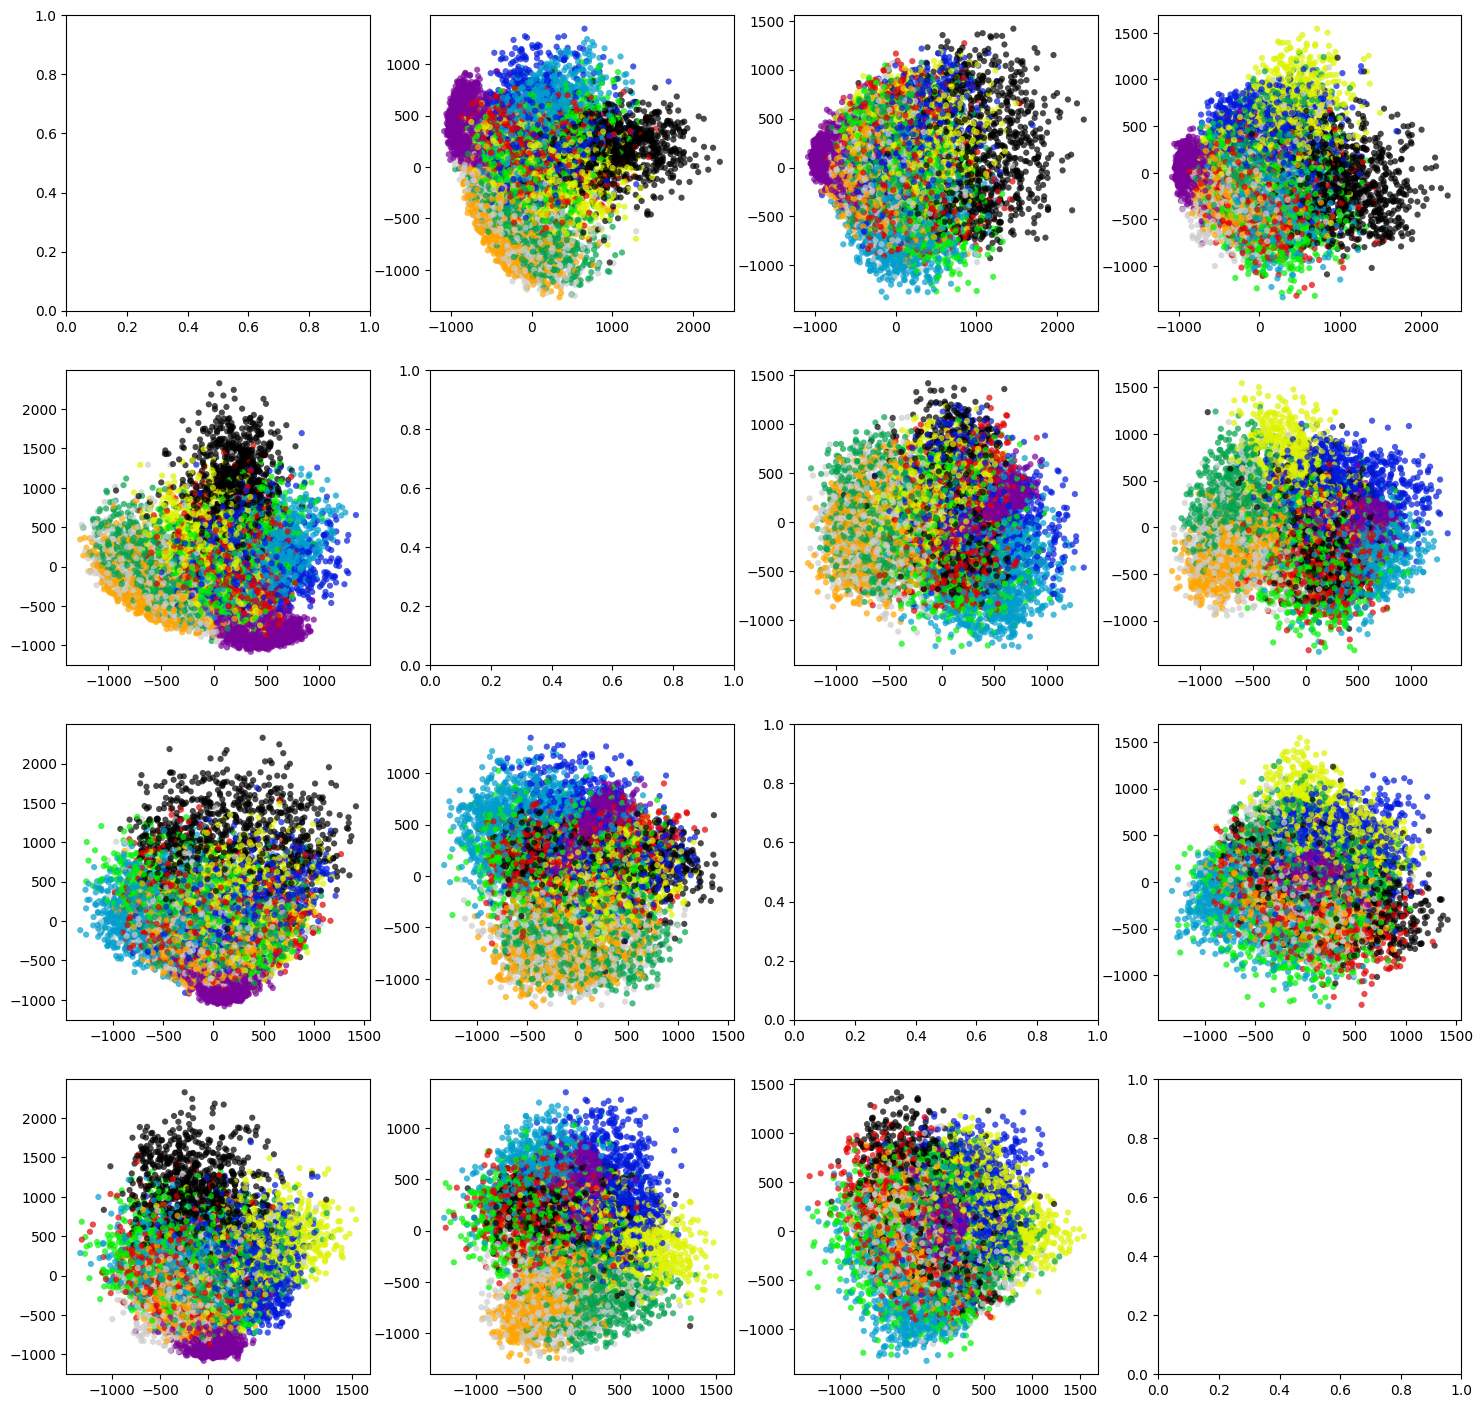

In [9]:
size = 4
plt.figure(figsize=(18, 18), dpi=100)
for x_ in range(size):
    for y_ in range(size):
        plt.subplot(size, size, 1 + x_*size + y_)
        if (x_ != y_):
            plt.scatter(x_test_pc[:, x_], x_test_pc[:, y_], c= list(map(int, y_test)), s=20, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 20))

# PCA+MinMax


LogisticRegression:
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.8961904761904762
Accuracy:  0.9055026455026455

KNN:
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 1 - > Accuracy = 0.9476190476190476
Accuracy:  0.9668783068783069

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 18 - > Accuracy = 0.7857142857142857
Accuracy:  0.8551322751322751

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.1 - > Accuracy = 0.9733333333333334
Accuracy:  0.9833862433862434


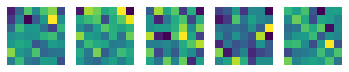

In [10]:
pca = PCA(n_components = 49)
scaler = MinMaxScaler()
x_train_s_pc_scmm = scaler.fit_transform(pca.fit_transform(x_train_s, y_train_s))
x_test_s_pc_scmm = scaler.transform(pca.transform(x_test_s))
x_train_pc_scmm = scaler.fit_transform(pca.fit_transform(x_train, y_train))
x_test_pc_scmm = scaler.transform(pca.transform(x_test))
dataset = [x_train_s_pc_scmm, y_train_s, x_test_s_pc_scmm, y_test_s, x_train_pc_scmm, y_train, x_test_pc_scmm, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc_scmm[i], (7,7)))

Test(dataset)

# PCA+StandartScater


LogisticRegression:
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.9
Accuracy:  0.9065608465608466

KNN:
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 1 - > Accuracy = 0.9438095238095238
Accuracy:  0.9658201058201058

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 14 - > Accuracy = 0.7857142857142857
Accuracy:  0.8507936507936508

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.9752380952380952
Accuracy:  0.9831746031746031


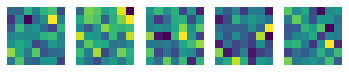

In [11]:
pca = PCA(n_components = 49)
scaler = StandardScaler()
x_train_s_pc_stsc = scaler.fit_transform(pca.fit_transform(x_train_s, y_train_s))
x_test_s_pc_stsc = scaler.transform(pca.transform(x_test_s))
x_train_pc_stsc = scaler.fit_transform(pca.fit_transform(x_train, y_train))
x_test_pc_stsc = scaler.transform(pca.transform(x_test))
dataset = [x_train_s_pc_stsc, y_train_s, x_test_s_pc_stsc, y_test_s, x_train_pc_stsc, y_train, x_test_pc_stsc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc_stsc[i], (7,7)))

Test(dataset)